# Числові дані: нормалізація

## Лінійне масштабування
Лінійне масштабування (частіше скорочується просто до масштабування) означає перетворення значень із рухомою комою з їх звичайного діапазону в стандартний (типові – від 0 до 1 або від –1 до +1).

Лінійне масштабування – гарний вибір, якщо виконуються всі умови, наведені нижче.

* Нижня й верхня межі даних не дуже змінюються із часом.
* Ознака містить небагато викидів або їх немає взагалі, і вони не екстремальні.
* Ознака приблизно рівномірно розподілена по всьому діапазону, тобто гістограма показала б приблизно однакові стовпчики для більшості значень.

```
Більшість реальних ознак не відповідають усім критеріям лінійного масштабування. Кращим методом нормалізації, ніж лінійне масштабування, зазвичай є масштабування за Z-оцінкою.
```

Використовуйте формулу, наведену нижче, щоб масштабувати дані до стандартного діапазону від 0 до 1 включно:

$$x' = (x - x_{min}) / (x_{max} - x_{min})$$

де:

* $x'$ – масштабоване значення;
* $x$ – початкове значення;
* $x_{min}$ – найменше значення з набору даних цієї ознаки;
* $x_{max}$ – найбільше значення з набору даних цієї ознаки.

In [142]:
data = [1, 2, 30, 4, 5, 6, 7, 8, 9, 100, 9, 8, 7, 6, 50, 4, 3, 2, 1]

In [143]:
def scaling(array):
    scaled_array = []
    x_min = min(array)
    delta_x = max(array) - x_min
    for x in array:
        x1 = (x - x_min) / delta_x
        scaled_array.append(x1)
    return scaled_array

In [144]:
scaled_data = scaling(data)

In [145]:
print(scaled_data)

[0.0, 0.010101010101010102, 0.29292929292929293, 0.030303030303030304, 0.04040404040404041, 0.050505050505050504, 0.06060606060606061, 0.0707070707070707, 0.08080808080808081, 1.0, 0.08080808080808081, 0.0707070707070707, 0.06060606060606061, 0.050505050505050504, 0.494949494949495, 0.030303030303030304, 0.020202020202020204, 0.010101010101010102, 0.0]


In [146]:
import pandas as pd

In [147]:
df_data = pd.DataFrame(data)
print(f"{df_data = }")

df_data =       0
0     1
1     2
2    30
3     4
4     5
5     6
6     7
7     8
8     9
9   100
10    9
11    8
12    7
13    6
14   50
15    4
16    3
17    2
18    1


In [148]:
df_scaled_data = pd.DataFrame(scaled_data)
print(f"{df_scaled_data = }")

df_scaled_data =            0
0   0.000000
1   0.010101
2   0.292929
3   0.030303
4   0.040404
5   0.050505
6   0.060606
7   0.070707
8   0.080808
9   1.000000
10  0.080808
11  0.070707
12  0.060606
13  0.050505
14  0.494949
15  0.030303
16  0.020202
17  0.010101
18  0.000000


<Axes: >

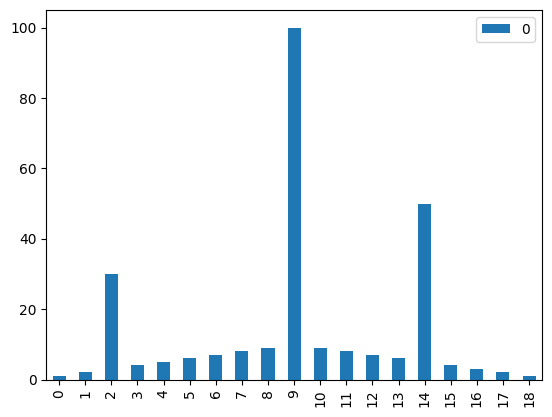

In [149]:
df_data.plot.bar()

<Axes: >

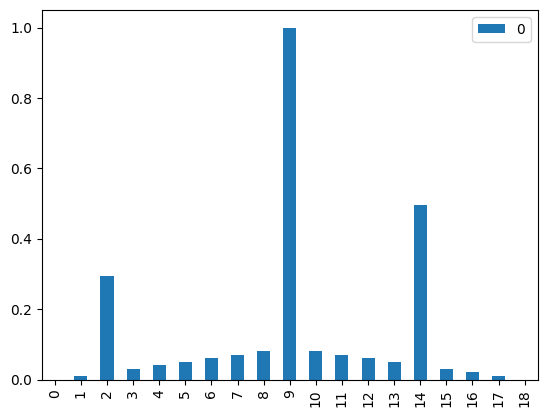

In [150]:
df_scaled_data.plot.bar()

## Масштабування за Z-оцінкою
Значення Z – це кількість стандартних відхилень, на які число більше чи менше за середнє значення. Наприклад, число, яке на 2 стандартні відхилення більше за середнє, має значення Z +2,0. Число, яке на 1,5 стандартного відхилення менше за середнє, має значення Z –1,5.

Представити ознаку за допомогою масштабування за Z-оцінкою – це зберегти її значення Z у векторі ознак.

Використовуйте формулу, наведену нижче, щоб нормалізувати $x$ до значення $Z$:

$$x' = (x - \mu) / \sigma$$

де:

* $x'$ – значення $Z$;
* $x$ – необроблене значення (тобто $x$ – це число, яке нормалізується);
* $\mu$ – середнє значення;
* $\sigma$ – стандартне відхилення.

In [151]:
def z_scaling(array):
    df_array = pd.DataFrame(array)
    scaled_array = []
    x_mean = df_array.mean()
    print(f"{x_mean = }")
    x_std = df_array.std()
    print(f"{x_std = }")
    for x in array:
        x1 = (x - x_mean) / x_std
        scaled_array.append(x1)
    return pd.DataFrame(scaled_array)

In [152]:
df_z_scaled_data = z_scaling(data)
print(f"{df_z_scaled_data = }")

x_mean = 0    13.789474
dtype: float64
x_std = 0    23.948043
dtype: float64
df_z_scaled_data =            0
0  -0.534051
1  -0.492294
2   0.676904
3  -0.408780
4  -0.367023
5  -0.325266
6  -0.283508
7  -0.241751
8  -0.199994
9   3.599899
10 -0.199994
11 -0.241751
12 -0.283508
13 -0.325266
14  1.512045
15 -0.408780
16 -0.450537
17 -0.492294
18 -0.534051


In [153]:
df_z_scaled_data

,0
0,-0.534051
1,-0.492294
2,0.676904
3,-0.408780
4,-0.367023
5,-0.325266
6,-0.283508
7,-0.241751
8,-0.199994
9,3.599899


<Axes: >

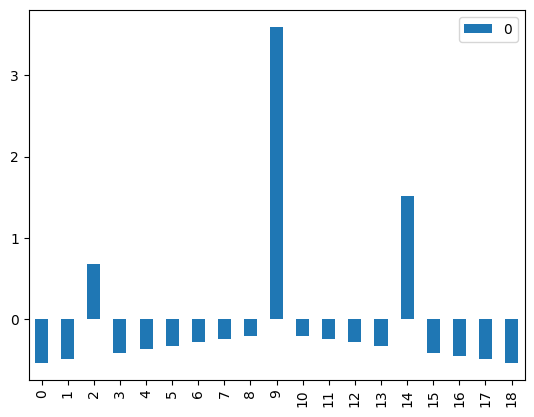

In [154]:
df_z_scaled_data.plot.bar()

In [155]:
from scipy.stats import zscore

In [156]:
df_zscore_data = pd.DataFrame(zscore(df_data))

In [157]:
df_zscore_data

,0
0,-0.548685
1,-0.505784
2,0.695453
3,-0.419981
4,-0.377080
5,-0.334179
6,-0.291277
7,-0.248376
8,-0.205475
9,3.698544


<Axes: >

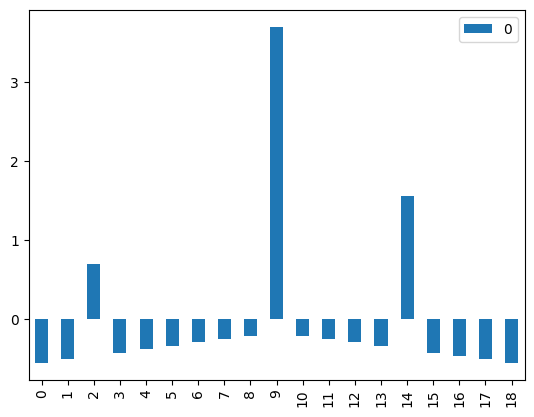

In [158]:
df_zscore_data.plot.bar()

## Логарифмічне масштабування
У логарифмічному масштабуванні обчислюється логарифм необробленого значення. Теоретично логарифм може мати будь-яку основу; на практиці логарифмічне масштабування зазвичай обчислює натуральний логарифм (ln).

Використовуйте формулу, наведену нижче, щоб нормалізувати значення $x$ до його логарифма:

$$x' = \ln(x)$$

де:

* $x'$ – натуральний логарифм $x$;

In [159]:
import math

In [160]:
def ln_scaling(array):
    return [math.log(x) for x in array]

In [161]:
print(ln_scaling([54.598, 100, 1000000]))


[3.9999972520433333, 4.605170185988092, 13.815510557964274]


In [162]:
df_ln_scaled_data = pd.DataFrame(ln_scaling(data))

<Axes: >

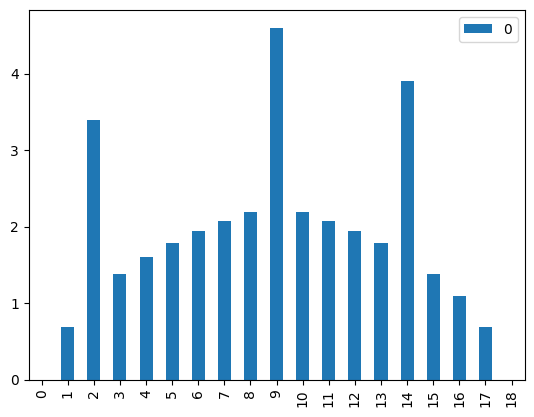

In [163]:
df_ln_scaled_data.plot.bar()

## Clipping (Обрізання)
Обрізання – це метод мінімізації впливу екстремальних викидів. Якщо коротко, обрізання зазвичай обмежує (зменшує) значення викидів до певного максимального значення. Ця ідея здається дивною, однак може бути дуже ефективною.


In [164]:
import numpy as np

In [165]:
np_clipped_data = np.clip(data, a_min=0, a_max=10)
print(f"{np_clipped_data = }")


np_clipped_data = array([ 1,  2, 10,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6, 10,  4,  3,
        2,  1])


In [167]:
pd_clipped_data = df_data.clip(lower=0, upper=10)

In [168]:
pd_clipped_data

,0
0,1
1,2
2,10
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [170]:
def clipped(array, x_min, x_max):
    clipped_array = []
    for x in array:
        if x < x_min:
            x1 = x_min
        elif x > x_max:
            x1 = x_max
        else:
            x1 = x
        clipped_array.append(x1)
    return clipped_array

In [171]:
clipped_data = clipped(data, x_min=0, x_max=10)
print(f"{clipped_data = }")

clipped_data = [1, 2, 10, 4, 5, 6, 7, 8, 9, 10, 9, 8, 7, 6, 10, 4, 3, 2, 1]


![](img.png)

# Числові дані: висновок

---
Якість моделі машинного навчання визначають її дані. Доречні дані сприяють належній роботі моделі, а невідповідні призводять до хибних прогнозів.

Нижче наведено рекомендації щодо роботи із числовими даними.

- Пам’ятайте, що модель машинного навчання взаємодіє з даними, які містяться у векторі ознак, а не в наборі даних.
- Нормалізуйте більшість числових ознак.
- Якщо перша стратегія нормалізації даних не принесла бажаного результату, виберіть іншу.
- Групування (інша назва – сегментація) іноді є кращим методом, ніж нормалізація.
- Подумайте, як мають виглядати ваші дані, і напишіть тести для перевірки, щоб підтвердити очікування. Перегляньте приклади нижче.
    * Абсолютне значення широти ніколи не має перевищувати 90. Можна написати тест, щоб перевірити, чи є у ваших даних значення широти, більше за 90.
    * Якщо дані стосуються лише штату Флорида, можна написати тести, щоб перевірити, чи широти знаходяться в межах від 24 до 31 включно.
- Візуалізуйте дані за допомогою точкових діаграм і гістограм. Шукайте відхилення.
- Збирайте статистичні дані не лише для цілого набору даних, але й для його менших підмножин. Це потрібно тому, що сукупна статистика іноді не показує проблеми, наявні в менших розділах набору даних.
- Документуйте всі трансформації даних.

---
### Дані – ваш найцінніший ресурс, тому ставтеся до них дбайливо.